In [ ]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
%matplotlib inline

In [108]:
class AccessControlQueue:
    def __init__(self):
        self.MAX_LEN = 10
        self.PRIORITIES = [1,2,4,8]
        self.state = None
    
    def step(self,action):
        free = self.state[0]
        priority = self.PRIORITIES[self.state[1]]
        if free == 0 and action == 1:
            raise Exception("Can't accept when queue is full")
        for i in range(self.MAX_LEN - free):
            if np.random.rand() < 0.06:
                free+=1
        free-=action
        self.state = (free,self._sample_priority())
        return self.state,priority if action else 0

    def reset(self):
        self.state = (self.MAX_LEN,self._sample_priority())
        return self.state
        
    def _sample_priority(self):
        return np.random.randint(0,4)
    

<h1> Let's first calculate average reward of random policy </h1>

1.65121131025927


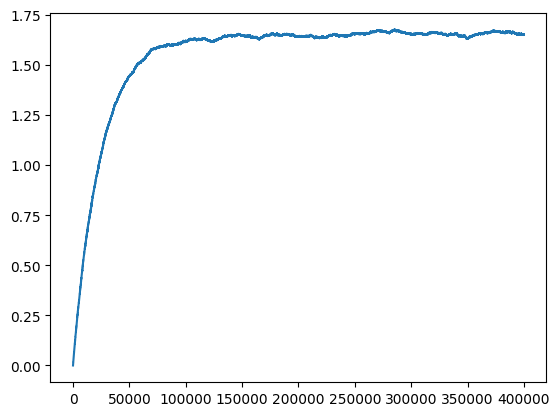

In [109]:
env = AccessControlQueue()
free,_ =env.reset()
rbar = 0
track = []
for i in range(400000):
    if free == 0 or np.random.rand() < 0.5:
        (free,_),reward = env.step(0)
    else:
        (free,_),reward = env.step(1)
    rbar = rbar + 0.00004*(reward - rbar)
    track.append(rbar)
plt.plot(track)
print(rbar)

<h1> Let's now use semi-gradient differential TD(0) SARSA </h1>

In [133]:
num_samples = int(2e6)
alpha = 1e-2
beta = 1e-2
q = np.zeros((11,4,2))
epsilon = 0.1
rbar = 0.
state = env.reset()
for i in range(num_samples):
    if state[0] == 0:
        action = 0
    else:
        action = np.random.randint(0,2)
    next_state,reward = env.step(action)
    if next_state[0] == 0:
        next_action = 0
    elif np.random.rand() < 0.1:
        next_action = np.random.randint(0,2)
    else:
        next_action = np.argmax(q[state[0],state[1]])
    delta = reward - rbar + q[next_state[0],next_state[1],next_action] - q[state[0],state[1],action]
    q[state[0],state[1],action] = q[state[0],state[1],action] + alpha * delta
    rbar = rbar + beta*(delta - rbar)
    state = next_state
print(rbar)

1.722555994379452


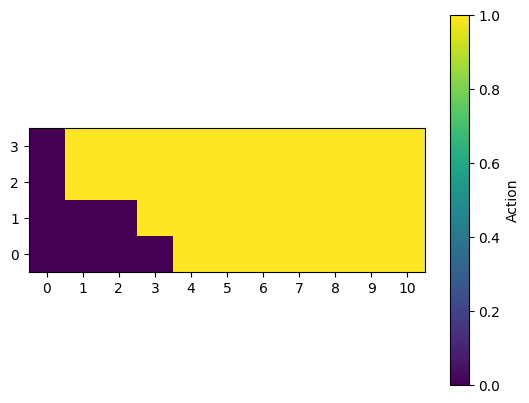

In [164]:
q_map = np.argmax(q,axis=2)
q_map = q_map.T
plt.imshow(q_map, cmap="viridis", interpolation="none", origin='lower')
plt.xticks(np.arange(0,11, 1.0))
plt.colorbar(label='Action');